# IMPORTING THE LİBRARİES

In [31]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

# LOAD THE DATA

In [33]:
from tensorflow.keras.datasets.mnist import load_data #fetch the data from keras

In [34]:
(X_train, y_train) , (X_test, y_test) = load_data()  #you can think this as train_test_split

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [35]:
print("Train size:", len(X_train))     
print("Test size:", len(X_test))  

Train size: 60000
Test size: 10000


In [36]:
X_train[24]  #Let's test some images

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 166, 222,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 197, 254, 218,   5,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  29, 249, 254, 254,   9,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [37]:
import matplotlib.pyplot as plt

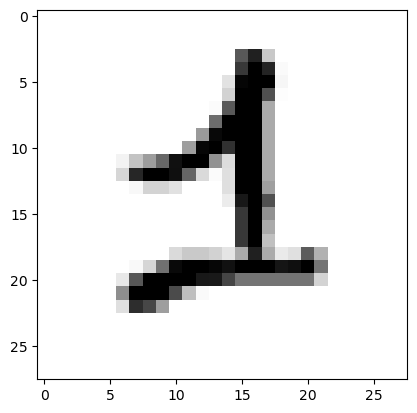

In [38]:
plt.imshow(X_train[24], cmap= plt.cm.binary); #visualize the matrix above

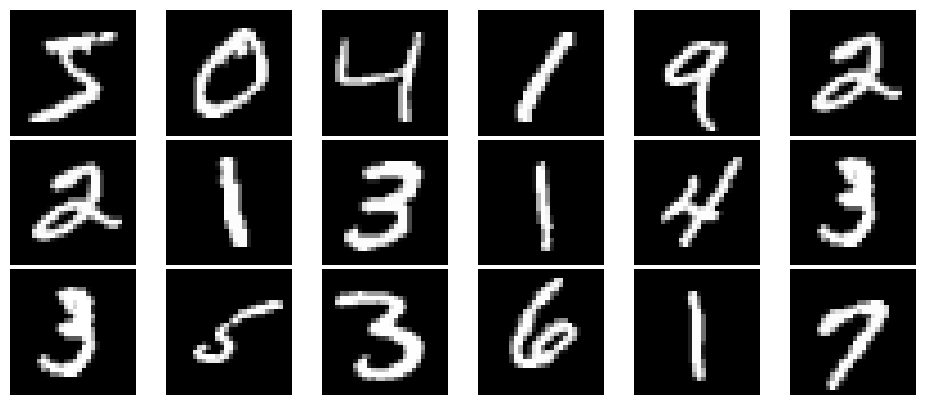

In [39]:
num_rows, num_cols = 3, 6                                       # Datadan 3 tane row, 6 tane column sectik.
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

Lets look some matrix values in order to see if data is scaled or not

In [41]:
X_train[19].min() #would be 0-1 if it's scaled

0

In [42]:
X_train[19].max() #would be 0-1 if it's scaled

255

##  ⚖️ WHY SCALING
<a id="data-scaling">
Normalizing an image dataset for CNN means adjusting the pixel values of images so they fall in a similar range, typically between 0 and 1. This helps the CNN learn faster and perform better.
</a>

In [44]:
# New Scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 28 * 28))
X_test = scaler.transform(X_test.reshape(-1, 28 * 28))

In [45]:
X_train[23].min() #now it's scaled

0.0

In [46]:
X_train[23].max()

1.0

In [47]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Converting data to tensors for CNN input is crucial because it:

1. Standardizes the input format for efficient computation.
2. Preserves spatial information crucial for image analysis.
3. Represents color channels, aiding in feature extraction.
4. Enables compatibility with CNN architectures, optimizing model performance.

In [49]:
X_train.shape, X_test.shape #now it's converted from matrix to tensor

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [50]:
X_train[245].shape 

(28, 28, 1)

The X_train dataset originally had a shape of (60000, 28, 28), which is a 3-dimensional matrix. However, CNN models require input data to be in a 4-dimensional format. Therefore, the dataset was reshaped into the format (60000, 28, 28, 1) by adding an extra dimension (1 for grayscale) to make it compatible for feeding into a CNN model. This reshaping process enables the CNN model to process the image data correctly.

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)


The code snippet converts class labels in the MNIST dataset, representing digits from 0 to 9, into a format suitable for machine learning algorithms. Instead of using the labels directly, which are single digits, the to_categorical() function transforms them into 10-dimensional vectors. For example, the label "5" becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. This vectorized representation is essential for multiclass classification tasks.

# 🧠LET'S BUILD OUR MODEL🧠

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout,Input

In [57]:
#Defien the input shape
input_shape=X_train[123].shape
input_shape

(28, 28, 1)

In [58]:
model = Sequential()
#model.add(Input(shape=input_shape)) #It helps model to compile better when u add the input as a "LAYER"
#CNN
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(28, 28, 1))) # if we use padding='valid' we would have lost shape of the images
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
#ANN

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

# New Compilation with learning rate customization
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


C:\Users\Vivek.Nakka\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Vivek.Nakka\AppData\Local\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# 🎯MODEL SUMMARY🎯

In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 9, 9, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,786 (171.04 KB)

 Trainable params: 43,434 (169.66 KB)

 Non-trainable params: 352 (1.38 KB)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor="val_loss", 
                           min_delta=0,
                           mode="auto",
                           restore_best_weights=True,
                           verbose=1,
                           patience=10)  # Reduced patience to 10 for faster training termination


In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    zoom_range=0.1
)
datagen.fit(X_train)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)


In [67]:
model.fit(datagen.flow(X_train, Y_train, batch_size=128), 
          validation_data=(X_val, Y_val),
          epochs=100, 
          verbose=1, 
          callbacks=[early_stop])


Epoch 1/100


C:\Users\Vivek.Nakka\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.7210 - loss: 0.8908 - val_accuracy: 0.7460 - val_loss: 0.7157
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9439 - loss: 0.1813 - val_accuracy: 0.9832 - val_loss: 0.0558
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9564 - loss: 0.1372 - val_accuracy: 0.9838 - val_loss: 0.0550
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9645 - loss: 0.1138 - val_accuracy: 0.9862 - val_loss: 0.0468
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9698 - loss: 0.0966 - val_accuracy: 0.9872 - val_loss: 0.0427
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9716 - loss: 0.0904 - val_accuracy: 0.9875 - val_loss: 0.0384
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9756 - loss: 0.0777 - val_accuracy: 0.9877 - val_loss: 0.0423
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9752 - loss: 0.0800 - val_

In [68]:
model.history.history

{'accuracy': [0.8517037034034729,
  0.9484074115753174,
  0.9591110944747925,
  0.966259241104126,
  0.9702407121658325,
  0.9726296067237854,
  0.9748148322105408,
  0.9763518571853638,
  0.9771296381950378,
  0.9777777791023254,
  0.977648138999939,
  0.9794629812240601,
  0.9795185327529907,
  0.9800925850868225,
  0.9810185432434082,
  0.9811481237411499,
  0.9817777872085571,
  0.9808148145675659,
  0.9818518757820129,
  0.9826666712760925,
  0.9835740923881531,
  0.982962965965271,
  0.9831666946411133,
  0.9834073781967163,
  0.9824073910713196,
  0.98416668176651,
  0.9839629530906677,
  0.984666645526886,
  0.9842036962509155,
  0.9838518500328064,
  0.9855740666389465,
  0.9848703742027283,
  0.9847592711448669,
  0.9851481318473816,
  0.9853333234786987,
  0.9864629507064819,
  0.9852777719497681,
  0.9859444499015808,
  0.9855740666389465,
  0.984666645526886,
  0.9863518476486206,
  0.9854629635810852,
  0.9852777719497681,
  0.9851666688919067,
  0.9865740537643433,
  0.9

In [69]:
summary = pd.DataFrame(model.history.history)
summary.head(50)[10:20:1]

,accuracy,loss,val_accuracy,val_loss
10,0.977648,0.071209,0.983833,0.051178
11,0.979463,0.066756,0.990000,0.031675
12,0.979519,0.066336,0.990333,0.030170
13,0.980093,0.064976,0.991167,0.030614
14,0.981019,0.060535,0.987833,0.037591
15,0.981148,0.061664,0.990667,0.030564
16,0.981778,0.058619,0.989833,0.035312
17,0.980815,0.060579,0.990667,0.030130
18,0.981852,0.056891,0.991833,0.032119
19,0.982667,0.055433,0.982500,0.057511


In [70]:
model.evaluate(X_test,Y_test)[1] #to see test accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0220


0.9940000176429749

In [71]:
from sklearn.metrics import classification_report

predictions = np.argmax(model.predict(X_test), axis=1)  # Get predictions
print(classification_report(y_test, predictions))  # Generate and print Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



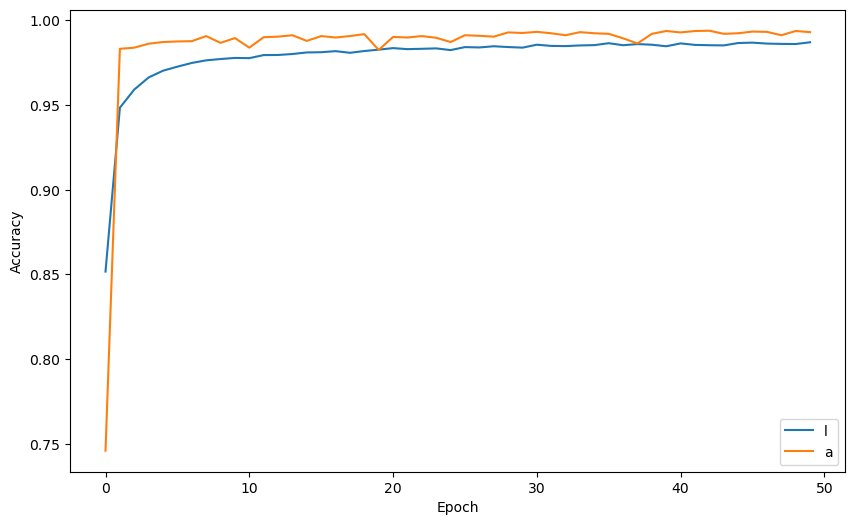

In [72]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

(0.95, 1.0)

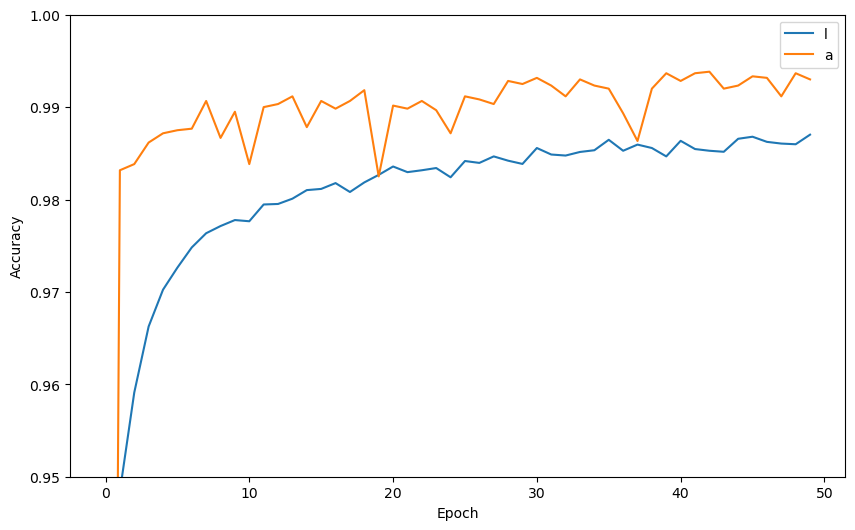

In [73]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

plt.ylim(0.95,1) #in order to zoom in

# 🚀 🚀 PREDICTION🚀 🚀 

In [75]:
preds = model.predict(X_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.8964713e-10, 5.0856141e-07, 2.5033810e-07, ..., 9.9999845e-01,
        1.3338587e-09, 7.8249698e-08],
       [1.4341171e-12, 1.5340248e-07, 9.9999988e-01, ..., 1.3600460e-10,
        5.3146561e-13, 4.6550294e-12],
       [4.3851689e-10, 9.9999988e-01, 7.7575765e-11, ..., 2.6614725e-08,
        9.9954534e-10, 3.3230273e-11],
       ...,
       [3.1991285e-10, 1.3102098e-07, 5.9428413e-09, ..., 2.4995316e-07,
        2.9570517e-06, 1.1485641e-07],
       [1.2549323e-10, 2.2363372e-12, 8.6463468e-11, ..., 1.5580165e-09,
        3.6457283e-07, 2.0293538e-08],
       [3.2320054e-06, 9.9802833e-09, 4.2639126e-06, ..., 2.8812194e-10,
        3.8577400e-05, 2.5709346e-08]], dtype=float32)

In [76]:
preds[0] #We have probabilities of each class we have to select the highest prob value

array([8.8964713e-10, 5.0856141e-07, 2.5033810e-07, 4.2647022e-07,
       2.5913960e-07, 7.0185191e-10, 9.0936932e-11, 9.9999845e-01,
       1.3338587e-09, 7.8249698e-08], dtype=float32)

In [77]:
predictions= np.argmax(preds, axis=1)

In [78]:
predictions #now we can see which label model predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [79]:
print(predictions[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


#  🎯 EVALUATION 🎯

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(confusion_matrix(y_test, predictions))

[[ 976    0    1    0    0    1    0    1    1    0]
 [   0 1129    1    2    0    0    0    3    0    0]
 [   0    0 1028    1    0    0    0    3    0    0]
 [   0    0    0 1006    0    2    0    1    1    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   1    0    0    4    0  885    1    0    0    1]
 [   3    3    1    0    1    2  947    0    1    0]
 [   0    0    2    0    0    0    0 1026    0    0]
 [   0    0    2    1    0    1    0    2  968    0]
 [   0    0    0    0    5    2    0    3    3  996]]


# PREDICTION OF TEST VALUES

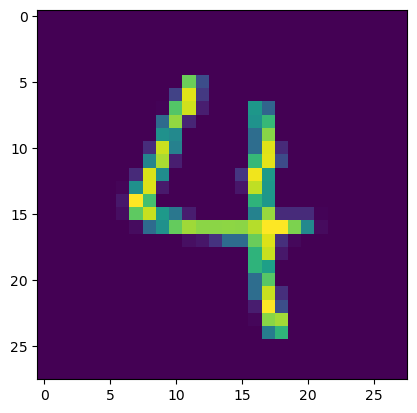

In [84]:
number_test = X_test[24]
plt.imshow(number_test); 

In [85]:
np.argmax(model.predict(number_test.reshape(1,28,28,1)), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([4], dtype=int64)

In [86]:
import nbformat

def extract_code_from_ipynb(ipynb_file, output_file):
    with open(ipynb_file, 'r', encoding='utf-8') as file:
        notebook = nbformat.read(file, as_version=4)
        
    code_cells = [cell['source'] for cell in notebook['cells'] if cell['cell_type'] == 'code']
    
    with open(output_file, 'w', encoding='utf-8') as file:
        for i, code in enumerate(code_cells, 1):
            file.write(code)
            file.write('\n\n')

# Replace 'notebook.ipynb' and 'output.py' with your file names
extract_code_from_ipynb('ann1.ipynb', 'output.py')